In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import string
import re
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples, wordnet 
from nltk.stem import WordNetLemmatizer

%matplotlib inline

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
stopwords_english = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [3]:
def pos_tag_convert(nltk_tag: str) -> str:
    '''Converts nltk tags to tags that are understandable by the lemmatizer.
    
    Args:
        nltk_tag (str): nltk tag
        
    Returns:
        _ (str): converted tag
    '''
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return wordnet.NOUN

    
def load_tweets():
    all_positive_tweets = twitter_samples.strings('positive_tweets.json')
    all_negative_tweets = twitter_samples.strings('negative_tweets.json')  
    return all_positive_tweets, all_negative_tweets


In [4]:
def process_tweet(tweet):
    '''
    Input: 
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    
    '''
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = nltk.pos_tag(tokenizer.tokenize(tweet))

    tweets_clean = []
    for word in tweet_tokens:
        if (word[0] not in stopwords_english and # remove stopwords
            word[0] not in string.punctuation): # remove punctuation
            stem_word = lemmatizer.lemmatize(word[0], pos_tag_convert(word[1]))
            tweets_clean.append(stem_word)
    return tweets_clean

In [5]:
# Load positive and negative tweets
all_positive_tweets, all_negative_tweets = load_tweets()

# View the total number of positive and negative tweets.
print(f"The number of positive tweets: {len(all_positive_tweets)}")
print(f"The number of negative tweets: {len(all_negative_tweets)}")

The number of positive tweets: 5000
The number of negative tweets: 5000


In [6]:
tweet_number = 4
print('Positive tweet example:')
print(all_positive_tweets[tweet_number])
print('\nNegative tweet example:')
print(all_negative_tweets[tweet_number])

Positive tweet example:
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days

Negative tweet example:
Dang starting next week I have "work" :(


In [7]:
all_positive_tweets_processed = [process_tweet(tweet) for tweet in all_positive_tweets]
all_negative_tweets_processed = [process_tweet(tweet) for tweet in all_negative_tweets]

In [8]:
val_pos = all_positive_tweets_processed[4000:]
train_pos = all_positive_tweets_processed[:4000]
val_neg = all_negative_tweets_processed[4000:]
train_neg = all_negative_tweets_processed[:4000]

train_x = train_pos + train_neg 
val_x  = val_pos + val_neg

train_y = [[1] for _ in train_pos] + [[0] for _ in train_neg]
val_y  = [[1] for _ in val_pos] + [[0] for _ in val_neg]

print(f"There are {len(train_x)} sentences for training.")
print(f"There are {len(train_y)} labels for training.\n")
print(f"There are {len(val_x)} sentences for validation.")
print(f"There are {len(val_y)} labels for validation.")

There are 8000 sentences for training.
There are 8000 labels for training.

There are 2000 sentences for validation.
There are 2000 labels for validation.


In [9]:
def build_vocabulary(corpus):
    '''Function that builds a vocabulary from the given corpus
    Input: 
        - corpus (list): the corpus
    Output:
        - vocab (dict): Dictionary of all the words in the corpus.
                The keys are the words and the values are integers.
    '''
    vocab = {'': 0, '[UNK]': 1} 

    index = 2
    for tweet in corpus:
        for word in tweet:
            if word not in vocab:
                vocab[word] = index
                index += 1
    
    return vocab


vocab = build_vocabulary(train_x)
num_words = len(vocab)

print(f"Vocabulary contains {num_words} words\n")
print(vocab)

Vocabulary contains 9535 words

{'': 0, '[UNK]': 1, 'followfriday': 2, 'top': 3, 'engage': 4, 'member': 5, 'community': 6, 'week': 7, ':)': 8, 'hey': 9, 'james': 10, 'odd': 11, ':/': 12, 'please': 13, 'call': 14, 'contact': 15, 'centre': 16, '02392441234': 17, 'able': 18, 'assist': 19, 'many': 20, 'thanks': 21, 'listen': 22, 'last': 23, 'night': 24, 'bleed': 25, 'amazing': 26, 'track': 27, 'scotland': 28, 'congrats': 29, 'yeaaah': 30, 'yipppy': 31, 'accnt': 32, 'verify': 33, 'rqst': 34, 'succeed': 35, 'get': 36, 'blue': 37, 'tick': 38, 'mark': 39, 'fb': 40, 'profile': 41, '15': 42, 'day': 43, 'one': 44, 'irresistible': 45, 'flipkartfashionfriday': 46, 'like': 47, 'keep': 48, 'lovely': 49, 'customer': 50, 'wait': 51, 'long': 52, 'hope': 53, 'enjoy': 54, 'happy': 55, 'friday': 56, 'lwwf': 57, 'second': 58, 'thought': 59, '’': 60, 'enough': 61, 'time': 62, 'dd': 63, 'new': 64, 'short': 65, 'enter': 66, 'system': 67, 'sheep': 68, 'must': 69, 'buy': 70, 'jgh': 71, 'go': 72, 'bayan': 73, ':D

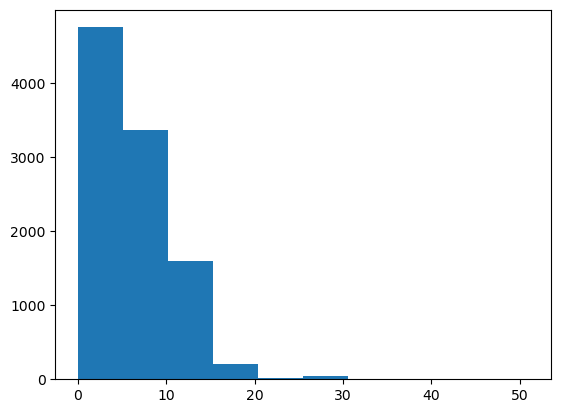

In [10]:
plt.hist([len(t) for t in train_x + val_x]);

In [11]:
def max_length(training_x, validation_x):
    """Computes the length of the longest tweet in the training and validation sets.

    Args:
        training_x (list): The tweets in the training set.
        validation_x (list): The tweets in the validation set.

    Returns:
        int: Length of the longest tweet.
    """
    max_len = 0
    for tweet in training_x:
        max_len = max(max_len, len(tweet))

    for tweet in validation_x:
        max_len = max(max_len, len(tweet))
    
    return max_len

max_len = max_length(train_x, val_x)
print(f'The length of the longest tweet is {max_len} tokens.')

The length of the longest tweet is 51 tokens.


In [12]:
def padded_sequence(tweet, vocab_dict, max_len, unk_token='[UNK]'):
    """transform sequences of words into padded sequences of numbers

    Args:
        tweet (list): A single tweet encoded as a list of strings.
        vocab_dict (dict): Vocabulary.
        max_len (int): Length of the longest tweet.
        unk_token (str, optional): Unknown token. Defaults to '[UNK]'.

    Returns:
        list: Padded tweet encoded as a list of int.
    """
    unk_ID = vocab_dict[unk_token]
    tweet_ids = [vocab_dict.get(word, unk_ID) for word in tweet]

    padded_tensor = tweet_ids + [0] * (max_len - len(tweet_ids))

    return padded_tensor

In [13]:
train_x_padded = [padded_sequence(x, vocab, max_len) for x in train_x]
val_x_padded = [padded_sequence(x, vocab, max_len) for x in val_x]

In [14]:
def relu(x):
    '''Relu activation function implementation
    Input: 
        - x (numpy array)
    Output:
        - activation (numpy array): input with negative values set to zero
    '''
    activation = np.maximum(0, x)
    return activation

In [15]:
x = np.array([[-2.0, -1.0, 0.0], [0.0, 1.0, 2.0]], dtype=float)
print("Test data is:")
print(x)
print("\nOutput of relu is:")
print(relu(x))

Test data is:
[[-2. -1.  0.]
 [ 0.  1.  2.]]

Output of relu is:
[[0. 0. 0.]
 [0. 1. 2.]]


In [16]:
def sigmoid(x):
    '''Sigmoid activation function implementation
    Input: 
        - x (numpy array)
    Output:
        - activation (numpy array)
    '''
    activation = 1 / (1 + np.exp(-x))
    return activation    

In [17]:
x = np.array([[-1000.0, -1.0, 0.0], [0.0, 1.0, 1000.0]], dtype=float)
print("Test data is:")
print(x)
print("\nOutput of sigmoid is:")
print(sigmoid(x))

Test data is:
[[-1000.    -1.     0.]
 [    0.     1.  1000.]]

Output of sigmoid is:
[[0.         0.26894142 0.5       ]
 [0.5        0.73105858 1.        ]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_22580\2661317466.py:8: RuntimeWarning: overflow encountered in exp
  activation = 1 / (1 + np.exp(-x))


In [18]:
class Dense():
    """
    A dense (fully-connected) layer.
    """
    def __init__(self, n_units, input_shape, activation, stdev=0.1, random_seed=42): # stdev is standard deviation
        self.n_units = n_units
        self.random_generator = np.random.default_rng(seed=random_seed)
        self.activation = activation
        w = self.random_generator.normal(scale=stdev, size=(input_shape[1], self.n_units))
        self.weights = w
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        dense = np.dot(x, self.weights)
        dense = self.activation(dense)
        return dense

In [19]:
z = np.array([[2.0, 7.0, 25.0]])

dense_layer = Dense(n_units=10, input_shape=z.shape, activation=relu)

print("Weights are:\n",dense_layer.weights)
print("Foward function output is:", dense_layer(z))

Weights are:
 [[ 0.03047171 -0.10399841  0.07504512  0.09405647 -0.19510352 -0.13021795
   0.01278404 -0.03162426 -0.00168012 -0.08530439]
 [ 0.0879398   0.07777919  0.00660307  0.11272412  0.04675093 -0.08592925
   0.03687508 -0.09588826  0.08784503 -0.00499259]
 [-0.01848624 -0.06809295  0.12225413 -0.01545295 -0.04283278 -0.03521336
   0.05323092  0.03654441  0.04127326  0.0430821 ]]
Foward function output is: [[0.21436609 0.         3.25266507 0.59085808 0.         0.
  1.61446659 0.17914382 1.64338651 0.87149558]]


In [20]:
help(tf.keras.layers.Embedding)

Help on class Embedding in module keras.src.layers.core.embedding:

class Embedding(keras.src.layers.layer.Layer)
 |  Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_constraint=None, mask_zero=False, weights=None, lora_rank=None, **kwargs)
 |  
 |  Turns positive integers (indexes) into dense vectors of fixed size.
 |  
 |  e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`
 |  
 |  This layer can only be used on positive integer inputs of a fixed range.
 |  
 |  Example:
 |  
 |  >>> model = keras.Sequential()
 |  >>> model.add(keras.layers.Embedding(1000, 64))
 |  >>> # The model will take as input an integer matrix of size (batch,
 |  >>> # input_length), and the largest integer (i.e. word index) in the input
 |  >>> # should be no larger than 999 (vocabulary size).
 |  >>> # Now model.output_shape is (None, 10, 64), where `None` is the batch
 |  >>> # dimension.
 |  >>> input_array = np.random.randint(1000, size=(32, 10))
 | 

In [21]:
def create_model(num_words, embedding_dim, max_len):
    """
    Creates a text classifier model
    
    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        max_len (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text classifier model
    """
    tf.random.set_seed(123)
    
    model = tf.keras.Sequential([ 
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_len),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]) 
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [22]:
model = create_model(num_words=num_words, embedding_dim=16, max_len=max_len)

h:\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
train_x_prepared = np.array(train_x_padded)
val_x_prepared = np.array(val_x_padded)

train_y_prepared = np.array(train_y)
val_y_prepared = np.array(val_y)

print('The data is prepared for training!\n')

print('Training:')
history = model.fit(train_x_prepared, train_y_prepared, epochs=20, validation_data=(val_x_prepared, val_y_prepared))

The data is prepared for training!

Training:
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5834 - loss: 0.6807 - val_accuracy: 0.9485 - val_loss: 0.6137
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9218 - loss: 0.5715 - val_accuracy: 0.9940 - val_loss: 0.4428
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9840 - loss: 0.3928 - val_accuracy: 0.9955 - val_loss: 0.2853
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.9922 - loss: 0.2483 - val_accuracy: 0.9955 - val_loss: 0.1849
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9941 - loss: 0.1610 - val_accuracy: 0.9955 - val_loss: 0.1265
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 0.1110 - val_accuracy: 0.9955 - val_loss: 0.0916
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0812 - val_accuracy: 0.9950 - val_loss: 0.0695
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

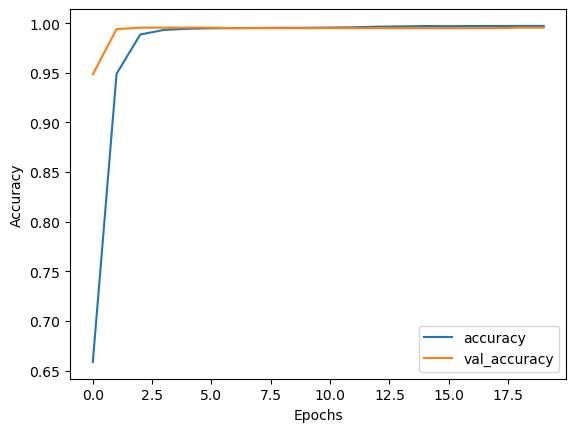

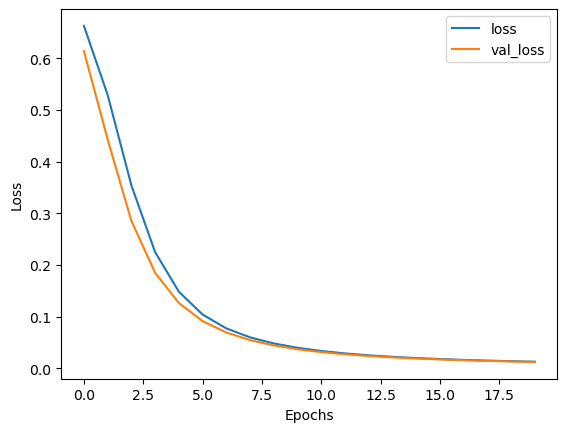

In [24]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric.title())
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

In [25]:
example_for_prediction = np.append(val_x_prepared[0:10], val_x_prepared[-10:], axis=0)
model.predict(example_for_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[9.9102670e-01],
       [9.9888813e-01],
       [9.9777567e-01],
       [9.9251831e-01],
       [9.9817681e-01],
       [9.9952686e-01],
       [9.9321944e-01],
       [9.8901558e-01],
       [9.9854195e-01],
       [9.9959552e-01],
       [1.2962539e-03],
       [3.4312482e-03],
       [1.6109775e-03],
       [1.6222455e-03],
       [1.8897123e-03],
       [8.2901266e-04],
       [1.9588068e-03],
       [1.2671691e-03],
       [2.0602518e-03],
       [3.3379141e-02]], dtype=float32)

In [26]:
def get_prediction_from_tweet(tweet, model, vocab, max_len):
    tweet = process_tweet(tweet)
    tweet = padded_sequence(tweet, vocab, max_len)
    tweet = np.array([tweet])

    prediction = model.predict(tweet, verbose=False)
    
    return prediction[0][0]

In [27]:
unseen_tweet = '@DLAI @NLP_team_dlai OMG!!! what a daaay, wow, wow. This AsSiGnMeNt was gr8.'

prediction_unseen = get_prediction_from_tweet(unseen_tweet, model, vocab, max_len)
print(f"Model prediction on unseen tweet: {prediction_unseen}")

Model prediction on unseen tweet: 0.7700527310371399


In [30]:
graded_very_positive_tweet = "I am incredibly happy and excited :)"

prediction = get_prediction_from_tweet(graded_very_positive_tweet, model, vocab, max_len)
print('prediction: ',prediction)

prediction:  0.99945176


In [32]:
# extract weights
embeddings_layer = model.layers[0]

embeddings = embeddings_layer.get_weights()[0]

print(f"Weights of embedding layer have shape: {embeddings.shape}")

Weights of embedding layer have shape: (9535, 16)


In [33]:
pca = PCA(n_components=2)
embeddings_2D = pca.fit_transform(embeddings)

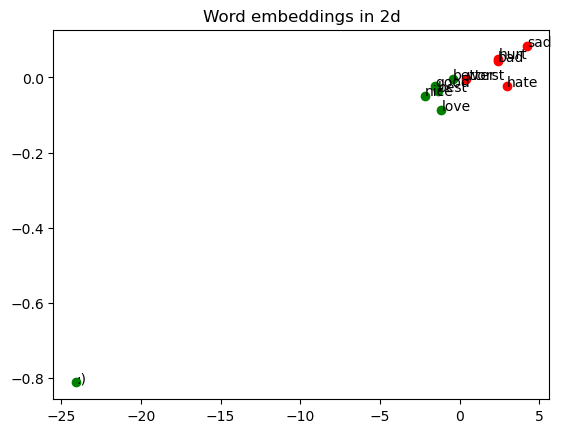

In [34]:
#Selection of negative and positive words
neg_words = ['bad', 'hurt', 'sad', 'hate', 'worst']
pos_words = ['best', 'good', 'nice', 'love', 'better', ':)']

#Index of each selected word
neg_n = [vocab[w] for w in neg_words]
pos_n = [vocab[w] for w in pos_words]

plt.figure()

#Scatter plot for negative words
plt.scatter(embeddings_2D[neg_n][:,0], embeddings_2D[neg_n][:,1], color = 'r')
for i, txt in enumerate(neg_words): 
    plt.annotate(txt, (embeddings_2D[neg_n][i,0], embeddings_2D[neg_n][i,1]))

#Scatter plot for positive words
plt.scatter(embeddings_2D[pos_n][:,0], embeddings_2D[pos_n][:,1], color = 'g')
for i, txt in enumerate(pos_words): 
    plt.annotate(txt,(embeddings_2D[pos_n][i,0], embeddings_2D[pos_n][i,1]))

plt.title('Word embeddings in 2d')

plt.show()